In [1]:
import pm4py

In [2]:
log = pm4py.read_xes(r'...datasets\second_group_of_synthetic_logs\1167521718_noisy.xes')
df = pm4py.convert_to_dataframe(log)
df

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0
...,...,...,...
6253,make phone call to sender and complete info,1970-04-26 18:46:50+00:00,999
6254,archive letter and infor mation,1970-04-26 18:46:51+00:00,999
6255,take letters and register to secretary,1970-04-26 18:46:52+00:00,999
6256,receive letter,1970-04-26 18:46:53+00:00,999


In [3]:
# print out the head of the event log
df.head()

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0


In [4]:
# combine the rows by case number 
activities= df["concept:name"].astype(str)
activities

0                            check  mail by  charlse
1                  archive  letter and  infor mation
2             take letters and register to secretary
3                                     receive letter
4              write letter with reason of rejection
                            ...                     
6253    make phone call to sender and complete  info
6254               archive  letter and  infor mation
6255          take letters and register to secretary
6256                                  receive letter
6257           write letter with reason of rejection
Name: concept:name, Length: 6258, dtype: object

In [5]:
import numpy as np
uniq=len(np.unique(activities))
uniq

6

In [6]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [7]:
corpus

['check mail charls',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'make phone call sender complet info',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'make phone call sender complet info',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'make phone call sender complet info',
 'check mail charls',
 'make phone call sender complet info',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'archiv

In [8]:
len(corpus)

6258

In [9]:
import nltk 
from nltk.tokenize import sent_tokenize
vocab_sent = []
for i in range(len(corpus)):
    all_sent = nltk.sent_tokenize(corpus[i])
    vocab_sent.append(all_sent)
    print(all_sent)

['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['make phone call sender complet info']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv

['make phone call sender complet info']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv let

['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['check mail charls']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']

['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['write letter reason reject']
['receiv letter']
['receiv letter']
['check mail charls']
['write letter reason reject']
['take letter regist secretari']
['take letter regist secretari']
['take letter regist secretari']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist sec

['write letter reason reject']
['archiv letter infor mation']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['take letter regist secretari']
['take letter regist secretari']
['write letter reason reject']
['receiv letter']
['make phone call sender complet info']
['receiv letter']
['check mail charls']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['make phone call sender complet info']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check 

['take letter regist secretari']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['receiv letter']
['make phone call sender complet info']
['take letter regist secretari']
['write letter reason reject']
['receiv letter']
['write letter reason reject']
['take letter regist secretari']
['archiv letter infor mation']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail ch

['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['take letter regist secretari']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['take letter regist secretari']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist sec

['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['make phone call sender complet info']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regis

['receiv letter']
['write letter reason reject']
['archiv letter infor mation']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason

['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regis

['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['archiv letter infor mation']
['check mail charls']
['receiv letter']
['archiv letter infor mation']
['take letter regist secretari']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['receiv letter']
['write le

['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['write letter reason reject']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']

['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['receiv letter']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter re

['check mail charls']
['receiv letter']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['take letter regist secretari']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['take letter regist secretari']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['archiv letter infor mation']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['ar

['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['take letter regist secretari']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['make phone call sender complet info']
['receiv letter']
['write letter reason reject']
['check mail charls

['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['archiv letter infor mation']
['write letter reason reject']
['write letter reason reject']
['receiv letter']
['take letter regist secretari']
['archiv letter infor mation']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['take letter regist secretari']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['make phone call sender complet info']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['take letter regist 

['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['receiv letter']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['archiv letter infor mation']
['check mail charls']

['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']

['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regis

['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv

['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['take letter regist secretari']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject

['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['make phone call sender complet info']
['write letter reason reject']
['check mail charls']
['receiv letter']
['take letter regist secretari']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['receiv letter']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist 

In [10]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(vocab_sent, vector_size=100, window=3, min_count=0, sg=1)
model.train(vocab_sent,total_examples=model.corpus_count,start_alpha=0.025, epochs=10)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay

In [11]:
model

In [12]:
vocabulary = model.wv.key_to_index
len(vocabulary)

6

In [14]:
sim_words = model.wv.most_similar('receiv letter')
sim_words

[('archiv letter infor mation', 0.17018888890743256),
 ('make phone call sender complet info', 0.13887983560562134),
 ('check mail charls', 0.004503031261265278),
 ('take letter regist secretari', -0.02775035984814167),
 ('write letter reason reject', -0.04461708664894104)]

In [15]:
import pandas as pd
df1=pd.DataFrame(vocab_sent)
df1['case']=df['ID']
df1['activities']= vocab_sent
df1

,0,case,activities
0,check mail charls,0,[check mail charls]
1,archiv letter infor mation,0,[archiv letter infor mation]
2,take letter regist secretari,0,[take letter regist secretari]
3,receiv letter,0,[receiv letter]
4,write letter reason reject,0,[write letter reason reject]
...,...,...,...
6253,make phone call sender complet info,999,[make phone call sender complet info]
6254,archiv letter infor mation,999,[archiv letter infor mation]
6255,take letter regist secretari,999,[take letter regist secretari]
6256,receiv letter,999,[receiv letter]


In [16]:
# combine the rows by case number 
df2 =df1.groupby('case', as_index=False).agg(lambda x: x.tolist())
df2

,case,0,activities
0,0,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
1,1,"[check mail charls, make phone call sender com...","[[check mail charls], [make phone call sender ..."
2,2,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
3,3,"[check mail charls, make phone call sender com...","[[check mail charls], [make phone call sender ..."
4,4,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
...,...,...,...
995,995,"[check mail charls, make phone call sender com...","[[check mail charls], [make phone call sender ..."
996,996,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
997,997,"[write letter reason reject, check mail charls...","[[write letter reason reject], [check mail cha..."
998,998,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."


In [17]:
len(df2['activities'][0])

5

In [18]:
df2['activities'][0][0]

['check mail charls']

In [19]:
activities=[]
for i in range(len(df2)):
      activities.append(df2['activities'][i])

activities

[[['check mail charls'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['make phone call sender complet info'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['make phone call sender complet info'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject'],
  ['make phone call sender complet info']],
 [['check mail charls'],
  ['make phone call sender complet info'],
  ['archiv letter infor mation'],
  ['take lette

In [20]:
activities[0][0]

['check mail charls']

In [21]:
len(activities[0])

5

In [22]:
len(activities)

1000

In [23]:
import numpy as np
vectors = []
for i in range(len(df2)):
        case_vector = []
        for j in range(len(activities[i])):
            try:
                case_vector.append(model.wv[activities[i][j]].mean(axis=0))
            except KeyError:
                pass
        vectors.append(np.array(case_vector).mean(axis=0))

In [24]:
len(vectors)
       
    

1000

In [25]:
np.shape(vectors)

(1000, 100)

In [26]:
np.shape(vectors[0])


(100,)

In [27]:
maxi=0
indexi =0
for i in range(len(df2)):
    if len(activities[i])>maxi:
          maxi = len(activities[i]) 
          indexi = i 


In [28]:
maxi, indexi

(13, 184)

In [36]:
# read the csv file of the event log
import pandas as pd
df2 = pd.read_csv(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Synthetic_Event_logs\Second Group of Synthetic Event Logs\1167521718.csv')
df2

,Unnamed: 0,ID,concept:name,Status
0,0,0,"['check mail by charlse', 'archive letter a...",Normal
1,1,1,"['check mail by charlse', 'make phone call t...",Normal
2,2,2,"['check mail by charlse', 'archive letter a...",Normal
3,3,3,"['check mail by charlse', 'make phone call t...",Normal
4,4,4,"['check mail by charlse', 'archive letter a...",Anomalous
...,...,...,...,...
995,995,995,"['check mail by charlse', 'make phone call t...",Normal
996,996,996,"['check mail by charlse', 'archive letter a...",Normal
997,997,997,"['write letter with reason of rejection', 'che...",Anomalous
998,998,998,"['check mail by charlse', 'archive letter a...",Normal


In [37]:
Y=df2['Status'].astype(str)
Y

0         Normal
1         Normal
2         Normal
3         Normal
4      Anomalous
         ...    
995       Normal
996       Normal
997    Anomalous
998       Normal
999       Normal
Name: Status, Length: 1000, dtype: object

In [38]:
# get binary values for the case status
y=pd.get_dummies(Y)
y=y.iloc[:,1].values
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from matplotlib import pyplot as plt



In [40]:
print("No. of unique labels ", len(np.unique(y)))
print("Label values ",np.unique(y))
#1 is for normal traces
#0 is for anomalous traces
print('-------')
print("Break down of the Normal and Anomalous Traces")
print(pd.value_counts(y, sort = True) )

No. of unique labels  2
Label values  [0 1]
-------
Break down of the Normal and Anomalous Traces
1    570
0    430
dtype: int64


In [41]:
X=np.array(vectors)
X.shape

(1000, 100)

In [42]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [44]:
#Make sure the scale worked correctly?
#A correct transformation of X_train will ensure that the means and variances of each column of the flattened X_train are 0 and 1, respectively. 
print('colwise mean', np.mean(train_data, axis=0).round(6))
print('colwise variance', np.var(train_data, axis=0))

colwise mean [ 0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0.  0.
 -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.
 -0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.
  0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0.
 -0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0. -0.  0.  0.
 -0. -0. -0. -0.  0.  0.  0. -0. -0. -0.]
colwise variance [1.0000018  1.0000015  1.0000036  0.99999917 0.9999956  1.0000002
 0.99999964 1.0000044  1.0000019  0.99999976 1.0000007  0.9999956
 0.9999993  1.0000018  1.0000045  1.0000033  1.0000031  1.0000007
 0.99999785 0.9999983  1.000002   1.0000027  1.0000045  0.99999815
 1.0000012  1.0000042  0.9999943  0.99999845 0.99999857 1.0000006
 0.9999974  1.0000017  0.99999815 1.0000026  1.0000023  1.0000019
 1.0000037  1.0000033  1.0000025  0.99999833 0.9999938  0.999999
 0.99999774 1.0000018  1.0000002  0.9999975  1.0000054  1.0000067
 0.9999995  1.0000004  0.9999998  1

In [45]:
#You will train the autoencoder using only the normal rhythms, which are labeled in this dataset as 1. 
#Separate the normal rhythms from the abnormal rhythms.
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = np.array(train_data[train_labels])
normal_test_data = np.array(test_data[test_labels])

anomalous_train_data = np.array(train_data[~train_labels])
anomalous_test_data = np.array(test_data[~test_labels])

In [46]:
len(normal_train_data),len(normal_test_data),len(anomalous_train_data),len(anomalous_test_data)

(459, 111, 341, 89)

In [47]:
# conver 2d dataframe to 3d array
import numpy as np
from numpy import newaxis
X_train_ar = np.array(normal_train_data) 
X_test_ar = np.array(test_data ) 
Normal_train_3d = X_train_ar[:,newaxis,:]
test_data_3d = X_test_ar[:,newaxis,:]
print(Normal_train_3d.shape)
print(test_data_3d.shape)

(459, 1, 100)
(200, 1, 100)


In [48]:
import keras
# define model
model = keras.Sequential()
#encoder
model.add(keras.layers.LSTM(128, activation='relu', input_shape=(Normal_train_3d.shape[1],Normal_train_3d.shape[2]), return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.RepeatVector(1))
#decoder
model.add(keras.layers.LSTM(64, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.LSTM(128, activation='relu', return_sequences=True))
model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.TimeDistributed(Dense(Normal_train_3d.shape[2])))
model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            117248    
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 64)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                        

In [49]:
import time
start_time = time.time()

In [50]:
#Notice that the LSTM is trained using only the normal traces, but is evaluated using the full test set.
history = model.fit(Normal_train_3d, Normal_train_3d, 
          epochs=100, 
          batch_size=32,
          validation_data=(test_data_3d, test_data_3d),
          shuffle=True)

Epoch 1/100
15/15 [==============================] - 5s 51ms/step - loss: 0.5674 - accuracy: 0.0000e+00 - val_loss: 0.8148 - val_accuracy: 0.0200
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5559 - accuracy: 0.0000e+00 - val_loss: 0.7757 - val_accuracy: 0.0050
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.3864 - accuracy: 0.0000e+00 - val_loss: 0.6366 - val_accuracy: 0.0200
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2061 - accuracy: 0.0044 - val_loss: 0.6244 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1345 - accuracy: 0.3704 - val_loss: 0.5926 - val_accuracy: 0.5700
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1076 - accuracy: 0.4706 - val_loss: 0.4943 - val_accuracy: 0.2650
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0870 - accuracy: 0.3268 - val_loss: 0.4659 - val_accuracy: 0.

15/15 [==============================] - 0s 9ms/step - loss: 0.0279 - accuracy: 0.6950 - val_loss: 0.4541 - val_accuracy: 0.5700
Epoch 59/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.6776 - val_loss: 0.4512 - val_accuracy: 0.5700
Epoch 60/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0256 - accuracy: 0.7386 - val_loss: 0.4540 - val_accuracy: 0.5700
Epoch 61/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0255 - accuracy: 0.7647 - val_loss: 0.4541 - val_accuracy: 0.5700
Epoch 62/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0270 - accuracy: 0.7364 - val_loss: 0.4500 - val_accuracy: 0.5700
Epoch 63/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0267 - accuracy: 0.7211 - val_loss: 0.4481 - val_accuracy: 0.5700
Epoch 64/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.7603 - val_loss: 0.4522 - val_accuracy: 0.5700
Epoch 65/100
15/15

In [51]:
elapsed_time = time.time() - start_time

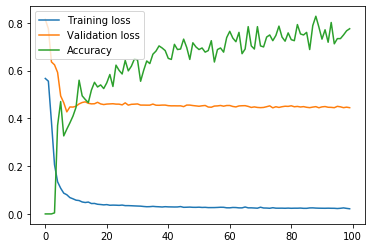

In [52]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 243.]),
 array([0.00154619, 0.00159597, 0.00164575, 0.00169553, 0.00174531,
        0.00179509, 0.00184487, 0.00189465, 0.00194443, 0.00199421,
        0.00204399, 0.00209377, 0.00214355, 0.00219333, 0.00224311,
        0.00229289, 0.00234267, 0.00239245, 0.00244223, 0.00249201,
        0.00254179, 0.00259157, 0.00264135, 0.00269113, 0.00274091,
        0.00279069, 0.00284047, 0.00289025, 0.00294003, 0.00298981,
        0.00303959], dtype=float32),
 <a list of 30 Patch objects>)

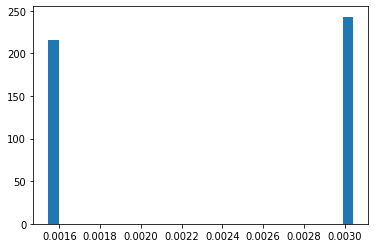

In [53]:
trainPredict = model.predict(Normal_train_3d)
trainMAE = np.mean(np.abs(trainPredict - Normal_train_3d),axis=2)
plt.hist(trainMAE, bins=30)

In [54]:
####We should not estimate the classification threshold from the test data. It will result in overfitting.
threshold = np.mean(trainMAE) + np.std(trainMAE)
print("Threshold: ", threshold)

Threshold:  0.0030822158


(array([114.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   3.,  23.,  22.,  11.,  11.,   1.,   2.,   1.,
          1.,   2.,   0.,   3.,   1.,   1.,   1.,   1.]),
 array([1.5461947e-03, 5.9913598e-02, 1.1828100e-01, 1.7664839e-01,
        2.3501579e-01, 2.9338321e-01, 3.5175061e-01, 4.1011801e-01,
        4.6848541e-01, 5.2685279e-01, 5.8522022e-01, 6.4358759e-01,
        7.0195502e-01, 7.6032239e-01, 8.1868982e-01, 8.7705719e-01,
        9.3542463e-01, 9.9379200e-01, 1.0521594e+00, 1.1105268e+00,
        1.1688942e+00, 1.2272617e+00, 1.2856290e+00, 1.3439964e+00,
        1.4023638e+00, 1.4607313e+00, 1.5190986e+00, 1.5774660e+00,
        1.6358334e+00, 1.6942009e+00, 1.7525682e+00], dtype=float32),
 <a list of 30 Patch objects>)

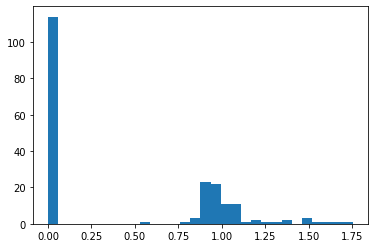

In [55]:
testPredict = model.predict(test_data_3d)
testMAE = np.mean(np.abs(testPredict - test_data_3d), axis=2)
plt.hist(testMAE, bins=30)

In [56]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import  auc, roc_curve

In [57]:
preds= tf.math.less(testMAE,threshold)
preds.shape

TensorShape([200, 1])

In [58]:
print("Accuracy = {}".format(accuracy_score(preds, test_labels)))
print("Precision = {}".format(precision_score(preds, test_labels)))
print("Recall = {}".format(recall_score(preds, test_labels)))
print("Fscore = {}".format(f1_score(preds, test_labels)))
print( 'Time=', elapsed_time )

Accuracy = 0.985
Precision = 1.0
Recall = 0.9736842105263158
Fscore = 0.9866666666666666
Time= 18.431198120117188


In [59]:
conf_matrix = confusion_matrix(preds, test_labels)
conf_matrix

array([[ 86,   0],
       [  3, 111]], dtype=int64)

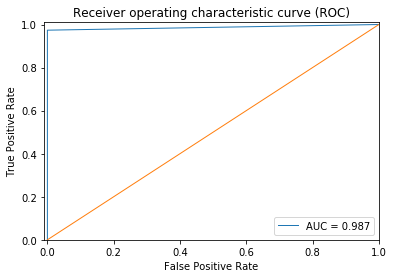

In [60]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(preds, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
